In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [0]:

#read the data
df = pd.read_csv("/content/data.csv") 
df.head()


,date,day,count,weather,cloud
0,1/1/2010,Friday,101,0.1,clear
1,1/2/2010,Saturday,34,0.2,cloudy
2,1/3/2010,Sunday,113,0.4,clear
3,1/4/2010,Monday,5,0.6,cloudy
4,1/5/2010,Tuesday,124,0.1,clear


In [0]:
df.dtypes

date        object
day         object
count        int64
weather    float64
cloud       object
dtype: object

In [0]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv("/content/data.csv", parse_dates=['date'], index_col='date')  #convert date into datetime and setting as index
data.head()

,day,count,weather,cloud
date,,,,
2010-01-01,Friday,101,0.1,clear
2010-01-02,Saturday,34,0.2,cloudy
2010-01-03,Sunday,113,0.4,clear
2010-01-04,Monday,5,0.6,cloudy
2010-01-05,Tuesday,124,0.1,clear


In [0]:
#check the dtypes
data.dtypes


day         object
count        int64
weather    float64
cloud       object
dtype: object

In [0]:
data.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', name='date', length=2373, freq=None)

In [0]:
ts = data.drop(["cloud","day","weather"], axis=1)

In [0]:
ts.head()

,count
date,
2010-01-01,101
2010-01-02,34
2010-01-03,113
2010-01-04,5
2010-01-05,124


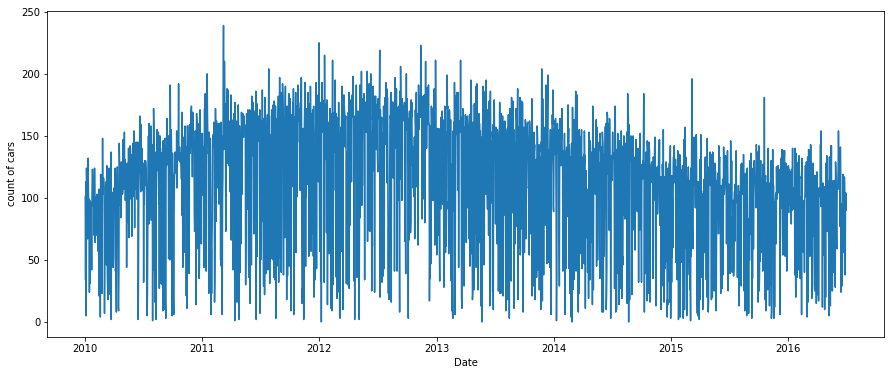

In [0]:
plt.xlabel("Date")
plt.ylabel("count of cars")
plt.plot(ts)

Check Stationarity of a Time Series

In [0]:
rolmean = ts.rolling(window=12).mean()  #mean for month...mothly predict...daily -- 365
rolstd = ts.rolling(window=12).std()
print(rolmean,rolstd)
    

                 count
date                  
2010-01-01         NaN
2010-01-02         NaN
2010-01-03         NaN
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
2010-01-09         NaN
2010-01-10         NaN
2010-01-11         NaN
2010-01-12   87.416667
2010-01-13   87.250000
2010-01-14   86.416667
2010-01-15   85.166667
2010-01-16   87.333333
2010-01-17   82.750000
2010-01-18   82.083333
2010-01-19   83.166667
2010-01-20   85.166667
2010-01-21   81.250000
2010-01-22   78.666667
2010-01-23   80.166667
2010-01-24   82.583333
2010-01-25   83.250000
2010-01-26   89.000000
2010-01-27   90.666667
2010-01-28   93.916667
2010-01-29   95.750000
2010-01-30   98.083333
...                ...
2016-06-01   88.166667
2016-06-02   87.750000
2016-06-03   88.083333
2016-06-04   94.083333
2016-06-05   96.666667
2016-06-06  100.416667
2016-06-07  102.166667
2016-06-08  108.750000
2016-06-09  108.416667
2016-06-10  107.666667
2016-06-11 

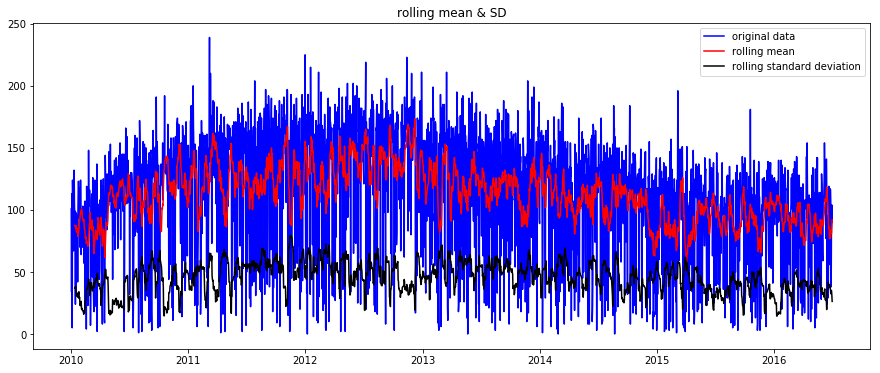

In [0]:
origin = plt.plot(ts, color = "blue", label = "original data")
mean = plt.plot(rolmean, color = "red", label = "rolling mean")
std_dvt = plt.plot(rolstd, color = "black", label = "rolling standard deviation")
plt.legend(loc = "best")
plt.title("rolling mean & SD")
plt.show(block = False)

In [0]:
from statsmodels.tsa.stattools import adfuller
    
   #Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts['count'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Results of Dickey-Fuller Test:


Test Statistic                   -4.400166
p-value                           0.000297
#Lags Used                       27.000000
Number of Observations Used    2345.000000
Critical Value (1%)              -3.433142
Critical Value (5%)              -2.862773
Critical Value (10%)             -2.567427
dtype: float64

null hypothisis says..p-value should be less around 0.5 atleast & critical values should be more than test statistics, here our data is hence stationary

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications. I leave it to you to try them out.



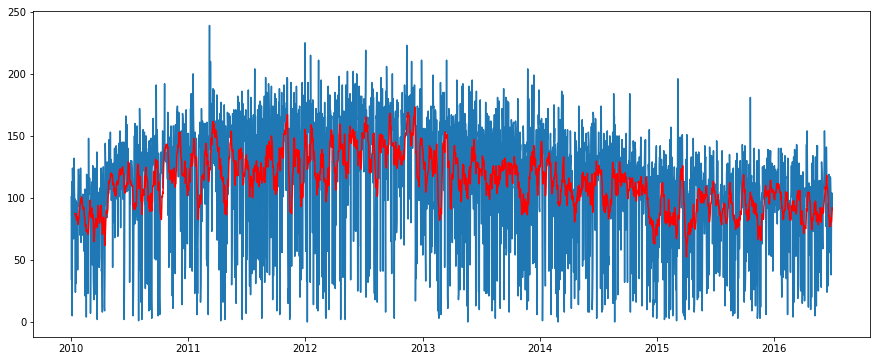

In [0]:
#moving_avg = pd.rolling_mean(ts_log,12) #error
moving_avg = ts.rolling(12).mean()
plt.plot(ts)
plt.plot(moving_avg, color='red')

In [0]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.head(12)

,count
date,
2010-01-01,NaN
2010-01-02,NaN
2010-01-03,NaN
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
2010-01-09,NaN


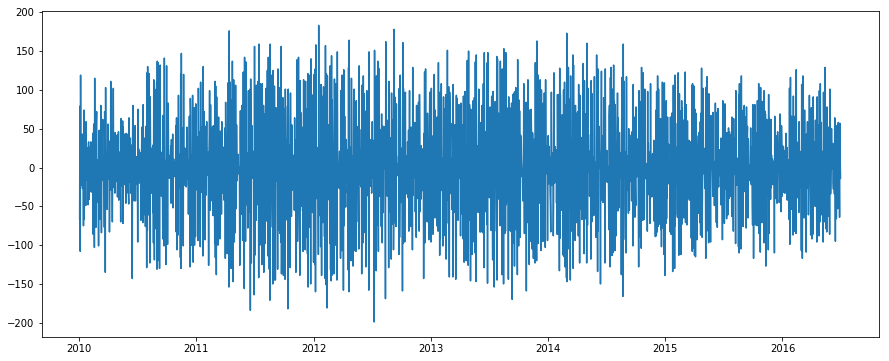

In [0]:
ts_diff = ts - ts.shift()
plt.plot(ts_diff)

In [0]:
ts_moving_avg_diff.dropna(inplace=True)
ts_moving_avg_diff.head(12)

,count
date,
2010-01-12,6.583333
2010-01-13,11.750000
2010-01-14,-62.416667
2010-01-15,12.833333
2010-01-16,-56.333333
2010-01-17,-13.750000
2010-01-18,13.916667
2010-01-19,10.833333
2010-01-20,5.833333


                count
date                 
2010-01-12   6.583333
2010-01-13  11.750000
2010-01-14 -62.416667
2010-01-15  12.833333
2010-01-16 -56.333333
2010-01-17 -13.750000
2010-01-18  13.916667
2010-01-19  10.833333
2010-01-20   5.833333
2010-01-21 -39.250000
2010-01-22  22.333333
2010-01-23  42.833333
2010-01-24  40.416667
2010-01-25  23.750000
2010-01-26   4.000000
2010-01-27  27.333333
2010-01-28 -23.916667
2010-01-29  -4.750000
2010-01-30  25.916667
2010-01-31   6.000000
2010-02-01 -32.750000
2010-02-02 -10.750000
2010-02-03 -15.333333
2010-02-04   3.500000
2010-02-05 -23.083333
2010-02-06  10.250000
2010-02-07  -3.416667
2010-02-08   7.250000
2010-02-09  -3.333333
2010-02-10 -32.500000
...               ...
2016-06-01 -29.166667
2016-06-02  21.250000
2016-06-03  18.916667
2016-06-04  17.916667
2016-06-05  26.333333
2016-06-06  53.583333
2016-06-07  32.833333
2016-06-08  -1.750000
2016-06-09  16.583333
2016-06-10   3.333333
2016-06-11 -29.916667
2016-06-12  27.666667
2016-06-13

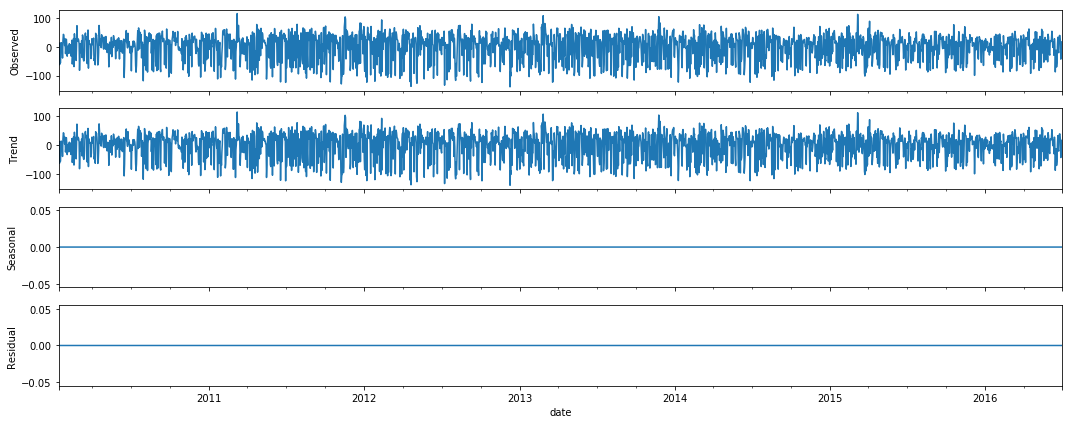

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose  #Decompose the time series
series = ts_moving_avg_diff  #ts_log_moving_avg_diff
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Forecasting a Time Series
The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8 (please explore on significance of acf and pacf)

In [0]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [0]:
lag_acf = acf(ts_moving_avg_diff, nlags=20)   #ts_log_moving_avg_diff, nlags=20 ///
lag_pacf = pacf(ts_moving_avg_diff, nlags=20, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

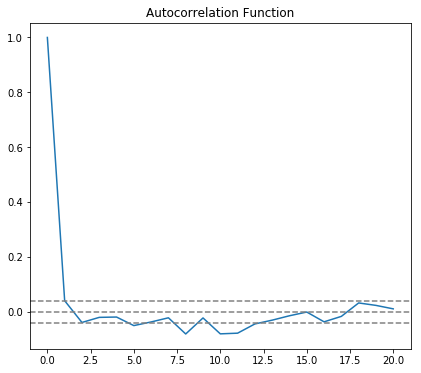

In [0]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')  # change ---ts_log_diff
plt.axhline(y=1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

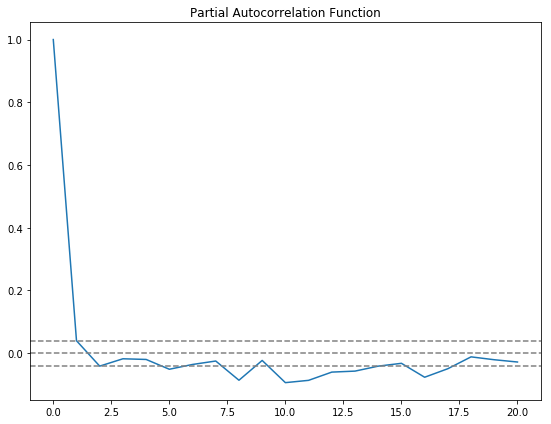

In [0]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

 the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.
he p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


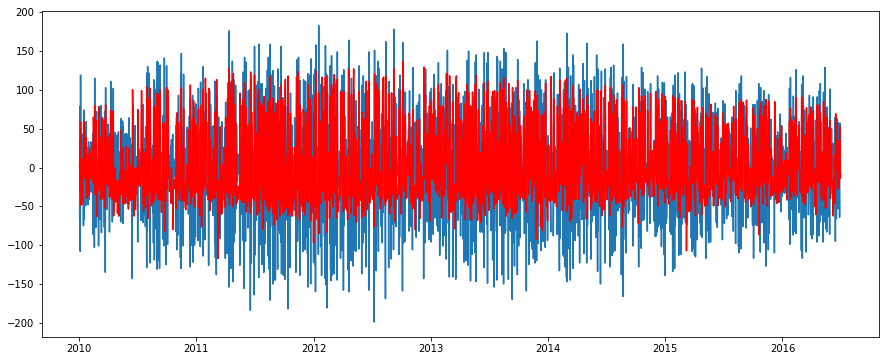

In [0]:
from statsmodels.tsa.arima_model import ARIMA   #fitting AR Model
model = ARIMA(ts, order=(0, 1, 1))  #ts --- ts_moving_avg_diff
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


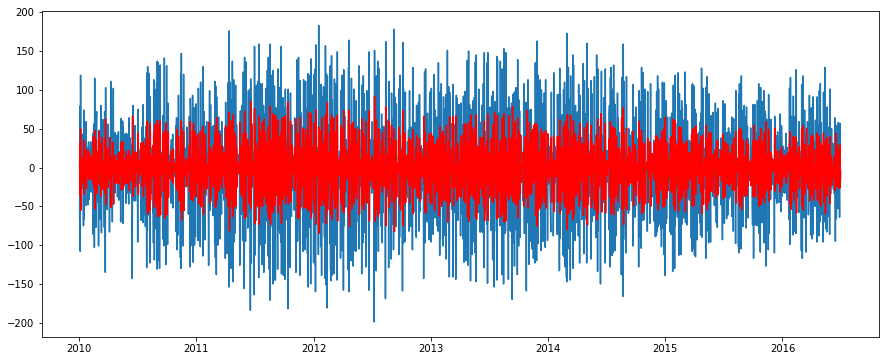

In [0]:
model = ARIMA(ts, order=(1, 1, 0))  #fitting MA model  
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_MA.fittedvalues, color='red')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


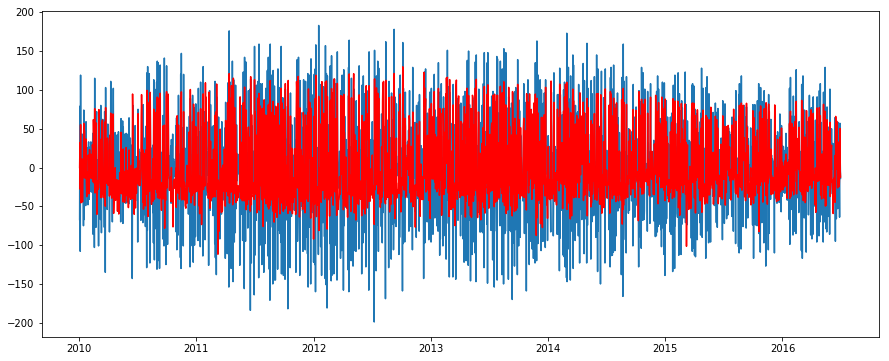

In [0]:
model = ARIMA(ts, order=(1, 1, 1))    #fitting arima model
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [0]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)  #converting into series
predictions_ARIMA_diff.head()

date
2010-01-02     0.000824
2010-01-03    31.892041
2010-01-04   -28.123351
2010-01-05    55.207066
2010-01-06   -45.565661
dtype: float64

In [0]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()  #taking cummulative sum
predictions_ARIMA_diff_cumsum.head()

date
2010-01-02     0.000824
2010-01-03    31.892865
2010-01-04     3.769514
2010-01-05    58.976580
2010-01-06    13.410919
dtype: float64

In [0]:
predictions_ARIMA_log = pd.Series(ts["count"].ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head(50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2010-01-01    101.000000
2010-01-02    101.000824
2010-01-03    132.892865
2010-01-04    104.769514
2010-01-05    159.976580
2010-01-06    114.410919
2010-01-07     92.089138
2010-01-08     91.570754
2010-01-09    102.710665
2010-01-10     94.105485
2010-01-11     49.707920
2010-01-12     32.599683
2010-01-13     26.475768
2010-01-14     16.452314
2010-01-15     73.159253
2010-01-16     60.576449
2010-01-17    108.337628
2010-01-18    119.335675
2010-01-19    105.534421
2010-01-20     94.273781
2010-01-21     86.294344
2010-01-22    122.956218
2010-01-23    104.494585
2010-01-24     66.913432
2010-01-25     30.964750
2010-01-26     11.085373
2010-01-27      4.773830
2010-01-28    -24.116139
2010-01-29     -8.027382
2010-01-30    -11.751827
2010-01-31    -45.586028
2010-02-01    -60.815303
2010-02-02    -37.876845
2010-02-03    -39.591724
2010-02-04    -35.730612
2010-02-05    -47.643046
2010-02-06    -30.623646
2010-02-07    -44.544474
2010-02-08    -45.137343
2010-02-09    -54.02

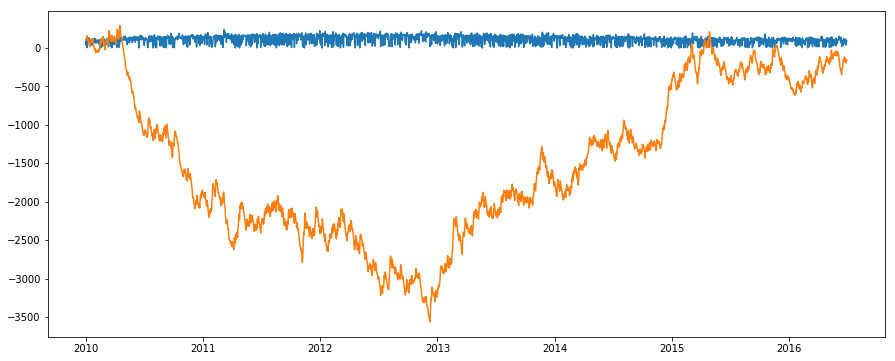

In [0]:
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA_log)

In [0]:
ts_diff

,count
date,
2010-01-01,NaN
2010-01-02,-67.0
2010-01-03,79.0
2010-01-04,-108.0
2010-01-05,119.0
2010-01-06,-20.0
2010-01-07,-23.0
2010-01-08,-14.0
2010-01-09,22.0


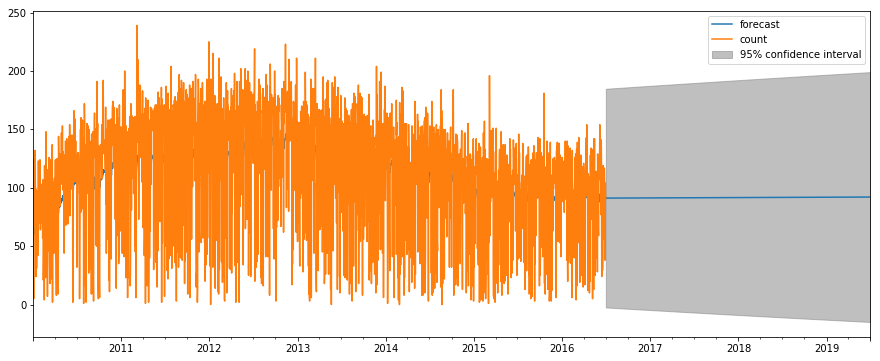

In [0]:
forecast = results_ARIMA.plot_predict(1,3468) #2373+1095
#results_ARIMA.forecast(steps = 1095)  #next 3 years----daily cont 365+365+365

In [0]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [0]:
fc_values = results_ARIMA.forecast(steps = 1095)  #next 3 years----daily cont
len(fc_values)

3

In [0]:
fc_values

(array([91.11655007, 91.17081009, 91.17419368, 91.17514064, 91.17597089,
        91.17679556, 91.17761996, 91.17844435, 91.17926874, 91.18009313,
        91.18091752, 91.18174191, 91.18256629, 91.18339068, 91.18421507,
        91.18503946, 91.18586384, 91.18668823, 91.18751262, 91.18833701,
        91.1891614 , 91.18998578, 91.19081017, 91.19163456, 91.19245895,
        91.19328334, 91.19410772, 91.19493211, 91.1957565 , 91.19658089,
        91.19740528, 91.19822966, 91.19905405, 91.19987844, 91.20070283,
        91.20152722, 91.2023516 , 91.20317599, 91.20400038, 91.20482477,
        91.20564916, 91.20647354, 91.20729793, 91.20812232, 91.20894671,
        91.2097711 , 91.21059548, 91.21141987, 91.21224426, 91.21306865,
        91.21389303, 91.21471742, 91.21554181, 91.2163662 , 91.21719059,
        91.21801497, 91.21883936, 91.21966375, 91.22048814, 91.22131253,
        91.22213691, 91.2229613 , 91.22378569, 91.22461008, 91.22543447,
        91.22625885, 91.22708324, 91.22790763, 91.2

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/   (understand ARIMA deep)